In [1]:
from graph_rules import *
from sympy import primerange, factorint
import pandas as pd
import networkx as nx # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

In [21]:
def random_binance(x: int) -> int:
    factors = factorint(x)
    p = max(factors.keys())
    return [y for p in factorint(x) for y in [x - p, x + p]]

In [38]:
g = nx.DiGraph()
queue = list(range(2, 30))
max_queue_size = len(queue)

while (g.number_of_edges() < 10) and len(queue) > 0:
    x = queue.pop(0)
    for y in random_binance(x):
        if y not in g.nodes:
            queue.append(y)
        g.add_edge(x, y)

In [39]:
def display(node):
    if node > 1:
        fs = factorint(node)
        min_factor = min(fs.keys())
        max_factor = max(fs.keys())
        return (min_factor, max_factor)
    else:
        return (0, 0)

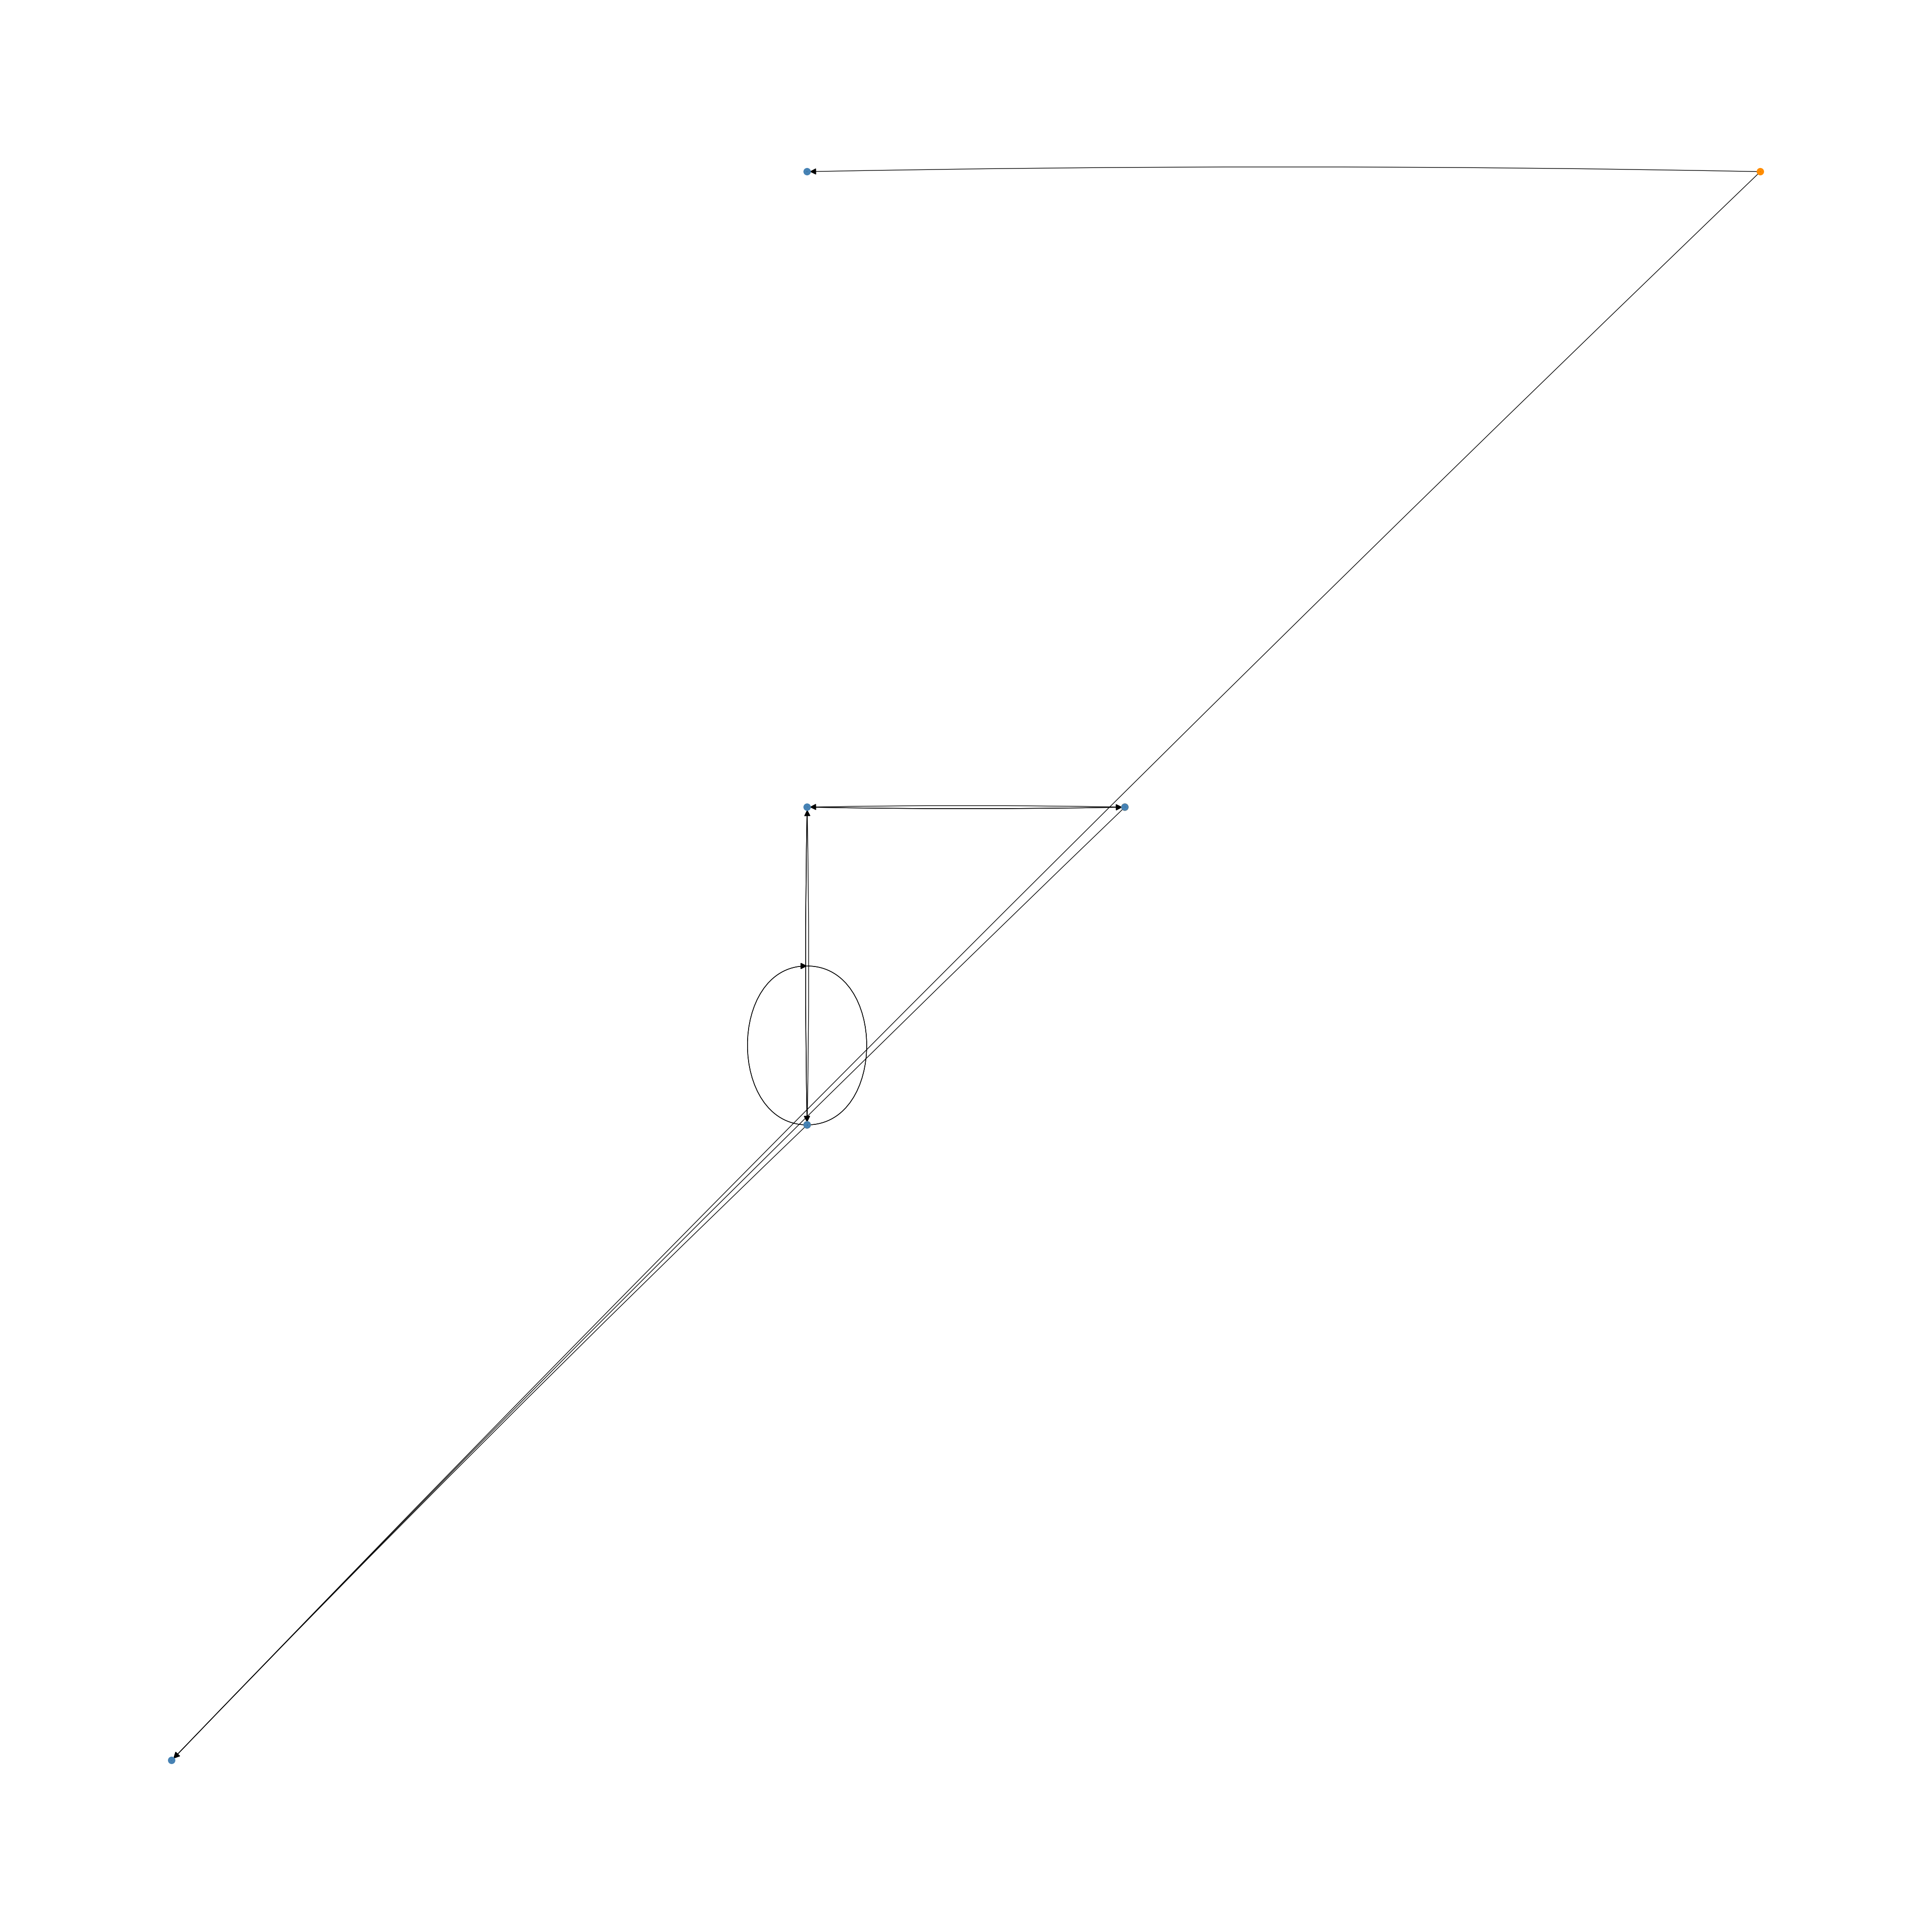

In [40]:
drawer = GraphDrawer\
        .create_default(figsize=(40, 40), node_size=100, arrow_size=20, font_size=0, colorizer=color_by_primality)\

drawer.layouter = lambda g: {k: display(k) for k in g.nodes}
drawer.graph_displayer.edge_displayer = create_edge_displayer(arrow_size=20, node_size=50, arrowstyle="-|>", connectionstyle="arc3,rad=0.01")
fig = drawer.draw(g)

In [ ]:
in_degree = pd.Series({k: v for (k, v) in g.in_degree()}, name="in_degree")
# out_degree = pd.Series({k: v for (k, v) in g.out_degree()}, name="out_degree") # it's always 1
df = pd.DataFrame([in_degree]).T
df.in_degree.value_counts().sort_index().plot.bar()
plt.yscale("log")

In [ ]:
eigenvals = np.linalg.eigvals(nx.adjacency_matrix(g).todense())
df_eigenvals = pd.Series(eigenvals).value_counts().reset_index()
df_eigenvals.columns = ["eigenval", "multiplicity"]
df_eigenvals = df_eigenvals.assign(real=np.real(df_eigenvals.eigenval), imag=np.imag(df_eigenvals.eigenval))
ax = df_eigenvals.plot.scatter(x="real", y="imag", c=df_eigenvals.multiplicity, cmap=sns.color_palette("crest", as_cmap=True))

In [ ]:
pd.Series(nx.closeness_centrality(g)).hist(bins=31)
plt.yscale("log")